ENSEMBLE METHODS COMPARISON

Model                Train Acc    Test Acc     CV Mean      Time (s)
----------------------------------------------------------------------
Single Tree              0.9819      0.8450      0.8075     0.124
Bagging (Manual)         0.9962      0.8825      0.8919     4.510
Random Forest            0.9994      0.9225      0.9006     1.953
AdaBoost                 0.8456      0.8350      0.8119     2.154
Gradient Boosting        1.0000      0.9275      0.9169     6.451
XGBoost                  1.0000      0.9375      0.9325     0.270
LightGBM                 1.0000      0.9300      0.9200     0.146


C:\Users\LEGION\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\LEGION\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\LEGION\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\LEGION\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\LEGION\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, b

CatBoost                 0.9956      0.9325      0.9275     0.944

 Saved: ensemble_comparison.png

FEATURE IMPORTANCE ANALYSIS


C:\Users\LEGION\AppData\Local\Temp\ipykernel_7520\1307670636.py:135: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(model_names, rotation=45, ha='right')


 Saved: feature_importance.png

BAGGING vs BOOSTING: Key Differences

🌲 BAGGING (Random Forest):
   • Trains trees in PARALLEL
   • Each tree sees random bootstrap sample
   • Reduces VARIANCE (prevents overfitting)
   • Trees are independent
   • Final prediction = Average of all trees

 BOOSTING (XGBoost, LightGBM, CatBoost):
   • Trains trees SEQUENTIALLY
   • Each tree corrects errors of previous trees
   • Reduces BIAS (improves accuracy)
   • Trees are dependent
   • Final prediction = Weighted sum of trees

 Saved: ensemble_learning_curves.png

 PERFORMANCE SUMMARY

 Best Test Accuracy: XGBoost (0.9375)
 Fastest Training:   Single Tree (0.124s)

 WHEN TO USE EACH:
   • Random Forest: Good default, handles noise well
   • XGBoost: Kaggle competitions, structured data
   • LightGBM: Large datasets, faster than XGBoost
   • CatBoost: Categorical features, less tuning needed
   • Gradient Boosting: When you need interpretability

 Ensemble methods implementation complete!


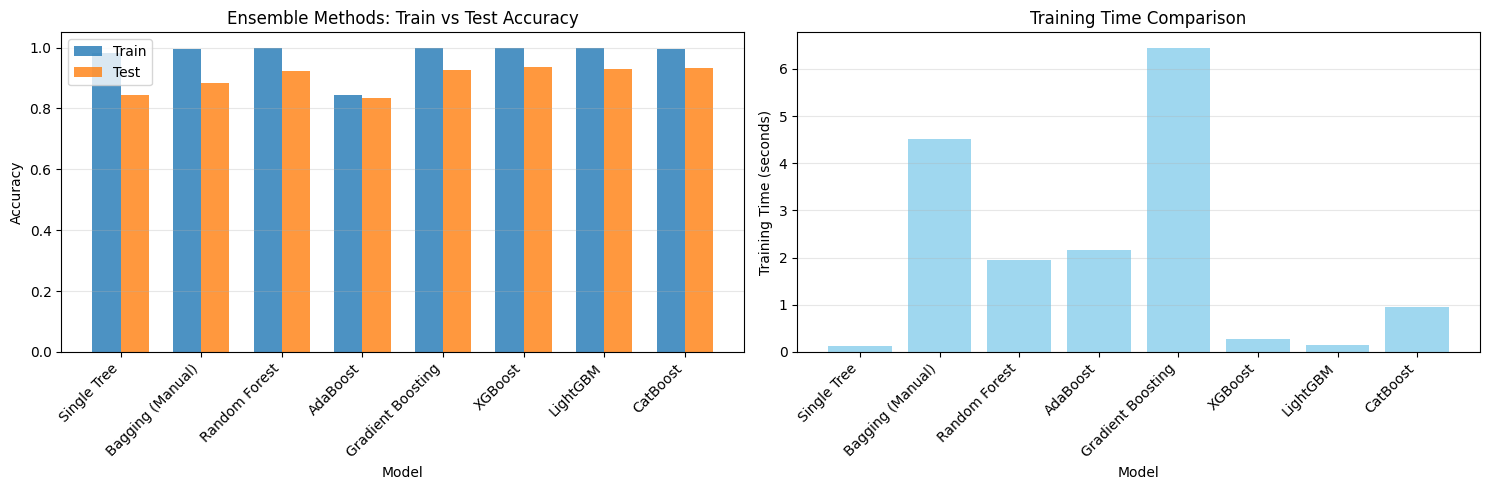

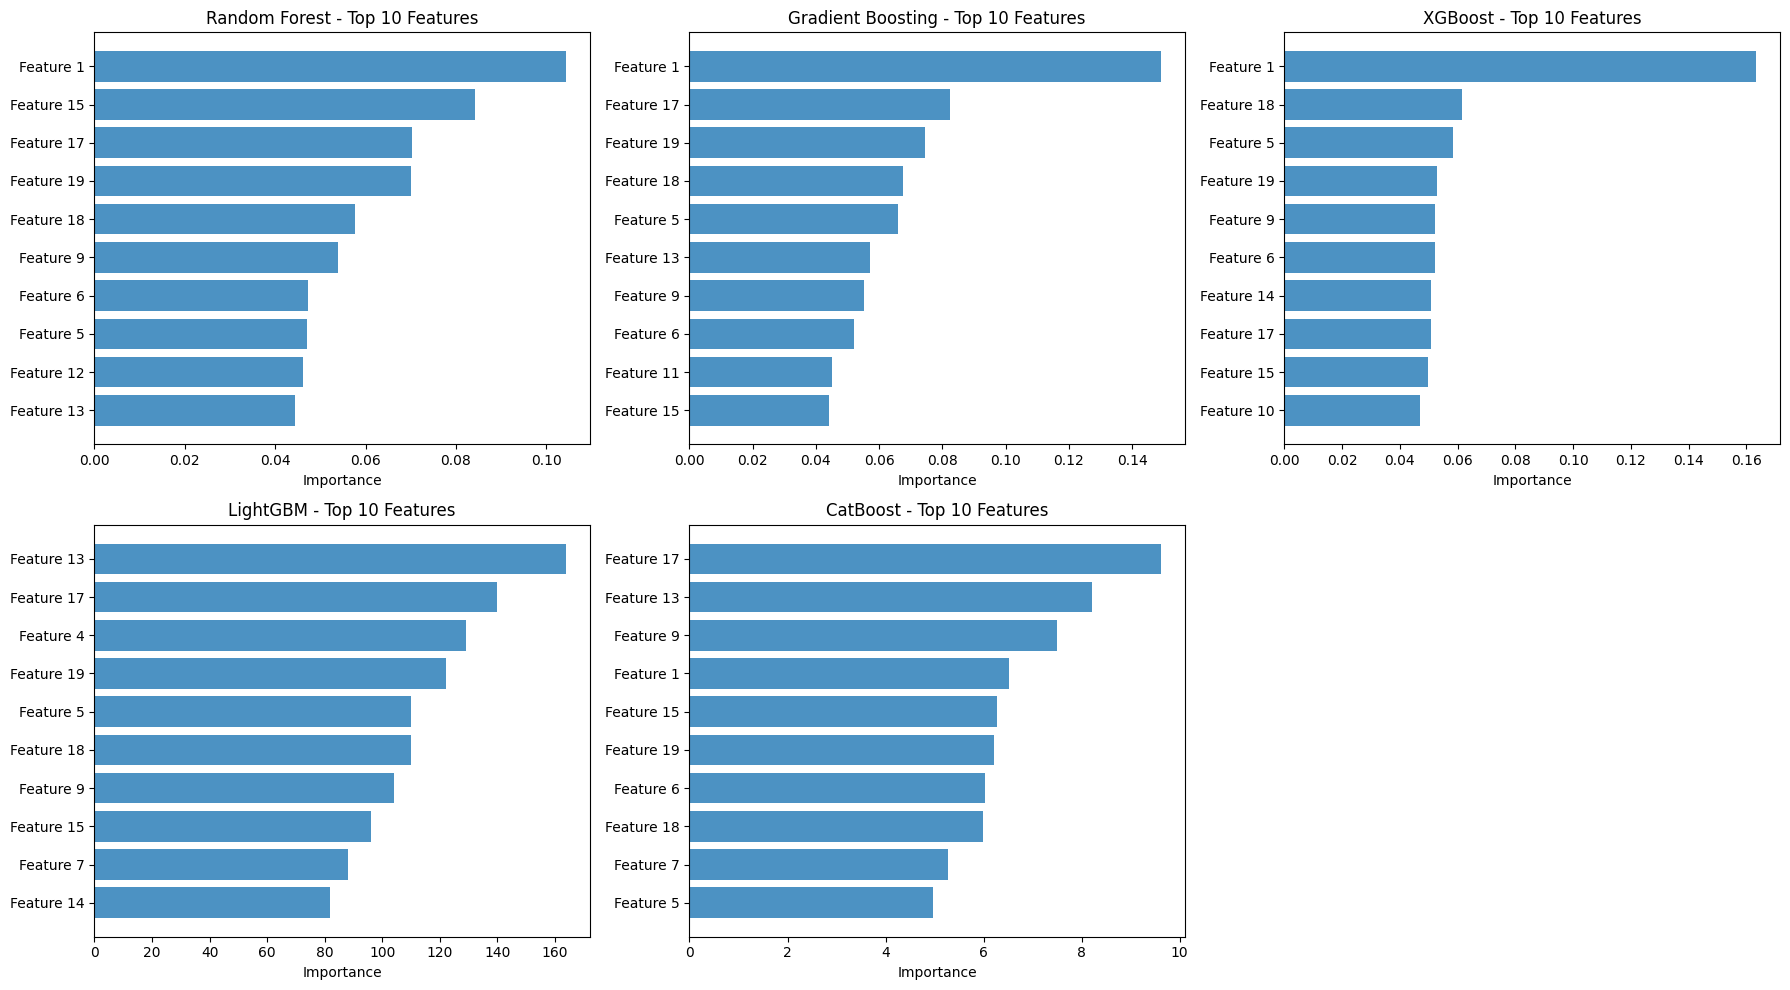

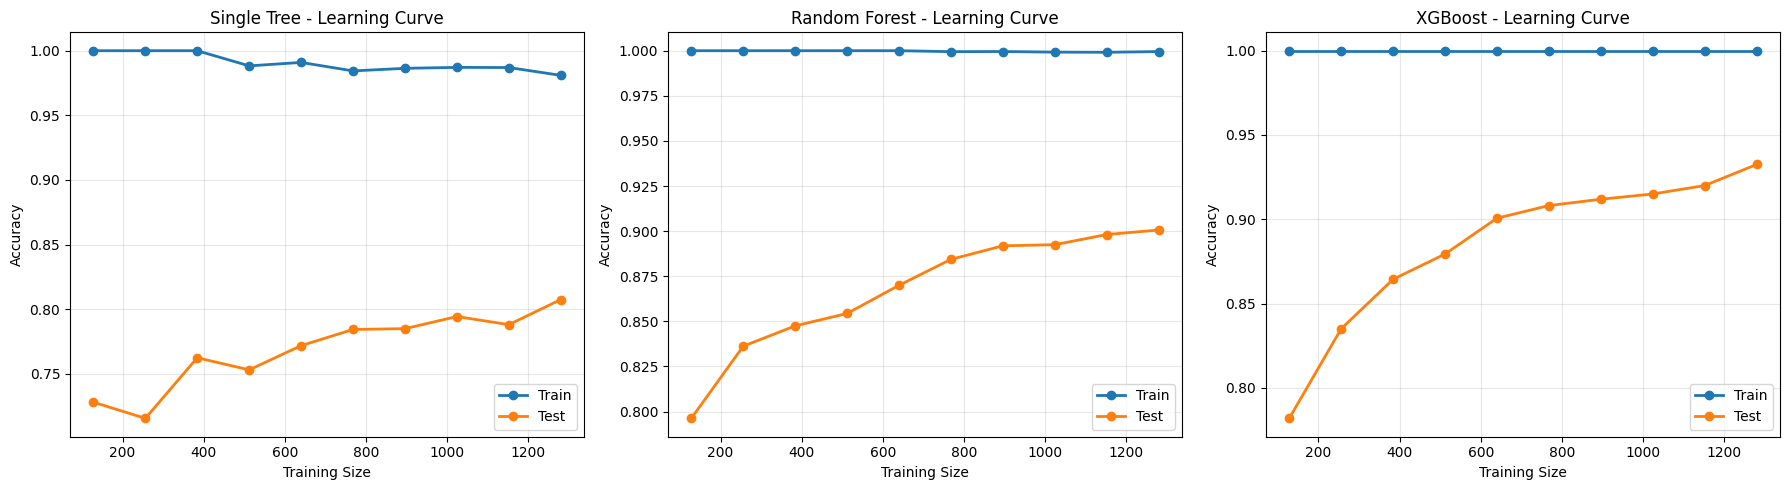

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier,
                              BaggingClassifier, AdaBoostClassifier)
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
import time
from sklearn.base import BaseEstimator, ClassifierMixin



# 1. BAGGING (Bootstrap Aggregating) - Manual
 

class SimpleBagging(BaseEstimator,ClassifierMixin):
    """Manual Bagging implementation"""
    
    def __init__(self, base_estimator, n_estimators=10):
        self.base_estimator = base_estimator
        self.n_estimators = n_estimators
        self.estimators = []
    
    def fit(self, X, y):
        n_samples = X.shape[0]
        
        for i in range(self.n_estimators):
            # Bootstrap sample
            idx = np.random.choice(n_samples, n_samples, replace=True)
            X_boot, y_boot = X[idx], y[idx]
            
            # Train estimator
            estimator = type(self.base_estimator)(**self.base_estimator.get_params())
            estimator.fit(X_boot, y_boot)
            self.estimators.append(estimator)
        
        return self
    
    def predict(self, X):
        # Average predictions from all estimators
        predictions = np.array([est.predict(X) for est in self.estimators])
        return np.round(predictions.mean(axis=0)).astype(int)
    
    def score(self, X, y):
        return np.mean(self.predict(X) == y)

 
# 2. COMPARE ENSEMBLE METHODS
 

print("="*60)
print("ENSEMBLE METHODS COMPARISON")
print("="*60)

# Generate data
X, y = make_classification(n_samples=2000, n_features=20, n_informative=15,
                          n_redundant=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Single Tree": DecisionTreeClassifier(max_depth=10, random_state=42),
    "Bagging (Manual)": SimpleBagging(DecisionTreeClassifier(max_depth=10), n_estimators=50),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=42),
    "XGBoost": xgb.XGBClassifier(n_estimators=100, max_depth=5, random_state=42, verbosity=0),
    "LightGBM": lgb.LGBMClassifier(n_estimators=100, max_depth=5, random_state=42, verbose=-1),
    "CatBoost": CatBoostClassifier(iterations=100, depth=5, random_state=42, verbose=0)
}

results = {}

print(f"\n{'Model':<20} {'Train Acc':<12} {'Test Acc':<12} {'CV Mean':<12} {'Time (s)'}")
print("-"*70)

for name, model in models.items():
    start = time.time()
    
    # Train
    model.fit(X_train, y_train)
    
    # Evaluate
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    cv_mean = cv_scores.mean()
    
    elapsed = time.time() - start
    
    results[name] = {
        'train': train_acc,
        'test': test_acc,
        'cv': cv_mean,
        'time': elapsed
    }
    
    print(f"{name:<20} {train_acc:>10.4f}  {test_acc:>10.4f}  {cv_mean:>10.4f}  {elapsed:>8.3f}")

 
# 3. VISUALIZE PERFORMANCE
 

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Accuracy comparison
model_names = list(results.keys())
train_accs = [results[m]['train'] for m in model_names]
test_accs = [results[m]['test'] for m in model_names]

x = np.arange(len(model_names))
width = 0.35

axes[0].bar(x - width/2, train_accs, width, label='Train', alpha=0.8)
axes[0].bar(x + width/2, test_accs, width, label='Test', alpha=0.8)
axes[0].set_xlabel('Model')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Ensemble Methods: Train vs Test Accuracy')
axes[0].set_xticks(x)
axes[0].set_xticklabels(model_names, rotation=45, ha='right')
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

# Training time comparison
times = [results[m]['time'] for m in model_names]
axes[1].bar(model_names, times, color='skyblue', alpha=0.8)
axes[1].set_xlabel('Model')
axes[1].set_ylabel('Training Time (seconds)')
axes[1].set_title('Training Time Comparison')
axes[1].set_xticklabels(model_names, rotation=45, ha='right')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('ensemble_comparison.png', dpi=100, bbox_inches='tight')
print("\n Saved: ensemble_comparison.png")

 
# 4. FEATURE IMPORTANCE COMPARISON
 

print("\n" + "="*60)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*60)

# Models with feature_importances_
importance_models = {
    "Random Forest": models["Random Forest"],
    "Gradient Boosting": models["Gradient Boosting"],
    "XGBoost": models["XGBoost"],
    "LightGBM": models["LightGBM"],
    "CatBoost": models["CatBoost"]
}

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, (name, model) in enumerate(importance_models.items()):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1][:10]  # Top 10 features
        
        axes[idx].barh(range(len(indices)), importances[indices], alpha=0.8)
        axes[idx].set_yticks(range(len(indices)))
        axes[idx].set_yticklabels([f'Feature {i}' for i in indices])
        axes[idx].set_xlabel('Importance')
        axes[idx].set_title(f'{name} - Top 10 Features')
        axes[idx].invert_yaxis()

# Hide extra subplot
axes[-1].axis('off')

plt.tight_layout()
plt.savefig('feature_importance.png', dpi=100, bbox_inches='tight')
print(" Saved: feature_importance.png")

 
# 5. UNDERSTANDING BOOSTING vs BAGGING
 

print("\n" + "="*60)
print("BAGGING vs BOOSTING: Key Differences")
print("="*60)

print("\n🌲 BAGGING (Random Forest):")
print("   • Trains trees in PARALLEL")
print("   • Each tree sees random bootstrap sample")
print("   • Reduces VARIANCE (prevents overfitting)")
print("   • Trees are independent")
print("   • Final prediction = Average of all trees")

print("\n BOOSTING (XGBoost, LightGBM, CatBoost):")
print("   • Trains trees SEQUENTIALLY")
print("   • Each tree corrects errors of previous trees")
print("   • Reduces BIAS (improves accuracy)")
print("   • Trees are dependent")
print("   • Final prediction = Weighted sum of trees")

 
# 6. LEARNING CURVES - Ensemble vs Single Tree
 

from sklearn.model_selection import learning_curve

train_sizes = np.linspace(0.1, 1.0, 10)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (name, model) in enumerate([
    ("Single Tree", models["Single Tree"]),
    ("Random Forest", models["Random Forest"]),
    ("XGBoost", models["XGBoost"])
]):
    train_sizes_abs, train_scores, test_scores = learning_curve(
        model, X_train, y_train, train_sizes=train_sizes, cv=5, n_jobs=-1
    )
    
    train_mean = train_scores.mean(axis=1)
    test_mean = test_scores.mean(axis=1)
    
    axes[idx].plot(train_sizes_abs, train_mean, 'o-', label='Train', linewidth=2)
    axes[idx].plot(train_sizes_abs, test_mean, 'o-', label='Test', linewidth=2)
    axes[idx].set_xlabel('Training Size')
    axes[idx].set_ylabel('Accuracy')
    axes[idx].set_title(f'{name} - Learning Curve')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('ensemble_learning_curves.png', dpi=100, bbox_inches='tight')
print("\n Saved: ensemble_learning_curves.png")

 
# 7. RECOMMENDATIONS


print("\n" + "="*60)
print(" PERFORMANCE SUMMARY")
print("="*60)

best_test = max(results.items(), key=lambda x: x[1]['test'])
fastest = min(results.items(), key=lambda x: x[1]['time'])

print(f"\n Best Test Accuracy: {best_test[0]} ({best_test[1]['test']:.4f})")
print(f" Fastest Training:   {fastest[0]} ({fastest[1]['time']:.3f}s)")

print("\n WHEN TO USE EACH:")
print("   • Random Forest: Good default, handles noise well")
print("   • XGBoost: Kaggle competitions, structured data")
print("   • LightGBM: Large datasets, faster than XGBoost")
print("   • CatBoost: Categorical features, less tuning needed")
print("   • Gradient Boosting: When you need interpretability")

print("\n Ensemble methods implementation complete!")